In [1]:
#standard inputs
import numpy as np
# import pandas as pd
# import time as time
# import sys
import os
import joblib


from PIL import Image
import random
import matplotlib.pyplot as plt

from skimage.transform import resize
# import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [3]:
pos_images = os.listdir('../classified_images/lawn')
neg_images = os.listdir('../classified_images/no_lawn/')

In [5]:
test_image = Image.open(f'../classified_images/lawn/{pos_images[0]}')

im_rgb = test_image.convert('RGB')
arr_200 = resize(np.array(im_rgb), (200,200,3))
r = arr_200[:,:,0]
g = arr_200[:,:,1]
b = arr_200[:,:,2]

out = np.dstack([r,g,b])

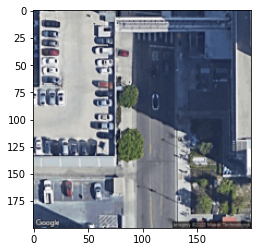

In [6]:
plt.imshow(out)

In [7]:
pos_im_class = []
for i in pos_images:
    if i[-3:] == 'png':
        im = Image.open(f'../classified_images/lawn/{i}')
        resized_im = resize(np.array(im), (200,200))
        pos_im_class.append((resized_im.reshape(40000), 1))
        
neg_im_class = []
for i in neg_images:
    if i[-3:] == 'png':
        im = Image.open(f'../classified_images/no_lawn/{i}')
        resized_im = resize(np.array(im), (200,200))
        neg_im_class.append((resized_im.reshape(40000), 0))
        

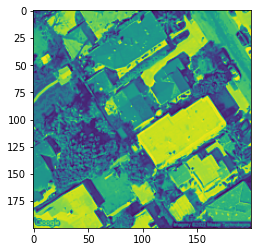

In [8]:
plt.imshow(pos_im_class[200][0].reshape(200,200))

In [9]:
all_im_class = pos_im_class+neg_im_class

In [10]:
len(pos_im_class), len(neg_im_class), len(all_im_class), len(pos_im_class)+len(neg_im_class)==len(all_im_class), 

(1367, 1275, 2642, True)

In [11]:
random.shuffle(all_im_class)

In [29]:
all_im_class

[(array([0.11789216, 0.31029412, 0.42892157, ..., 0.35808824, 0.35686275,
         0.36078431]),
  1),
 (array([0.1127451 , 0.31568627, 0.39362745, ..., 0.90980392, 0.91372549,
         0.91764706]),
  1),
 (array([0.3495098 , 0.3620098 , 0.41985294, ..., 0.02352941, 0.02352941,
         0.02352941]),
  0),
 (array([0.2622549 , 0.34044118, 0.7379902 , ..., 0.10588235, 0.10588235,
         0.10588235]),
  1),
 (array([0.14166667, 0.09901961, 0.57696078, ..., 0.68627451, 0.56348039,
         0.1379902 ]),
  1),
 (array([0.41470588, 0.28039216, 0.30367647, ..., 0.17058824, 0.20588235,
         0.23406863]),
  0),
 (array([0.52794118, 0.5002451 , 0.68995098, ..., 0.10588235, 0.10514706,
         0.10196078]),
  0),
 (array([0.89215686, 0.88014706, 0.90759804, ..., 0.62745098, 0.62892157,
         0.63872549]),
  1),
 (array([0.80759804, 0.83946078, 0.81764706, ..., 0.16617647, 0.16127451,
         0.18553922]),
  1),
 (array([0.40073529, 0.30318627, 0.31029412, ..., 0.74877451, 0.72794118,

In [30]:
X = np.array([i[0] for i in all_im_class])
y = np.array([i[1] for i in all_im_class])

In [12]:
y.mean()

0.5174110522331568

In [13]:
X.shape, y.shape

((2642, 40000), (2642,))

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 5)

In [155]:
X_test.shape

(529, 40000)

In [156]:
rf_model = RandomForestClassifier(n_estimators = 200, random_state = 0, )
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

In [157]:
filename = 'rf_model.sav'
joblib.dump(rf_model, filename)

['rf_model.sav']

In [158]:
mod = joblib.load(filename)

In [159]:
rf_model.score(X_test, y_test), mod.score(X_test, y_test)

(0.6427221172022685, 0.6427221172022685)

In [141]:
y_pred = mod.predict(X_test)

In [142]:
X_test.shape, X_test[0].reshape(1,-1).shape

((529, 40000), (1, 40000))

1


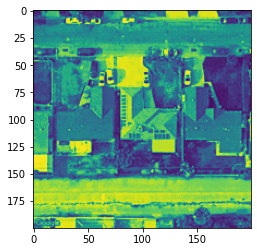

In [143]:
index = 10

print(mod.predict(X_test[index].reshape(1,-1))[0])

plt.imshow(X_test[index].reshape(200,200))

In [144]:
f1_score(y_test, y_pred)

0.9405405405405406

In [145]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,